In [2]:
import pandas as pd

# Load the CSV file into a DataFrame and parse dates
file_path = '/Users/kreshnayogi/Desktop/Programs/MLkagglecomp/train.csv'
data = pd.read_csv(file_path)
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
print(data)

     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

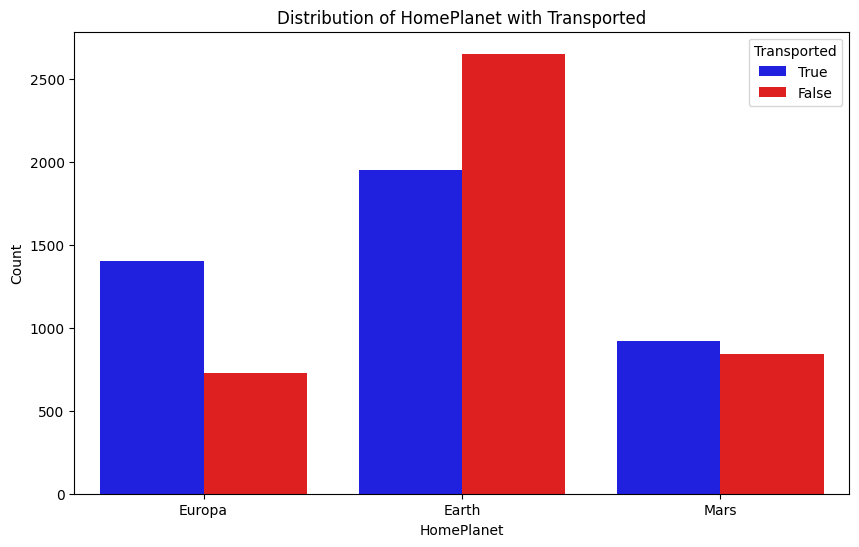

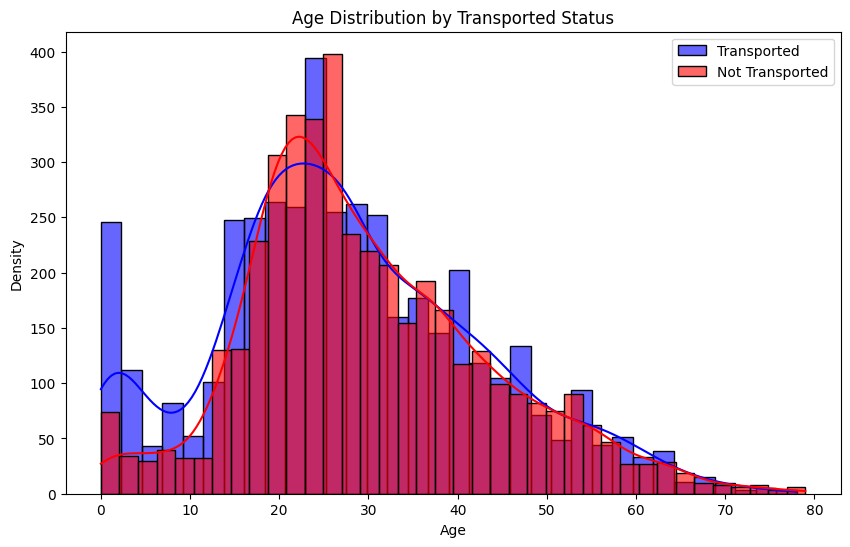

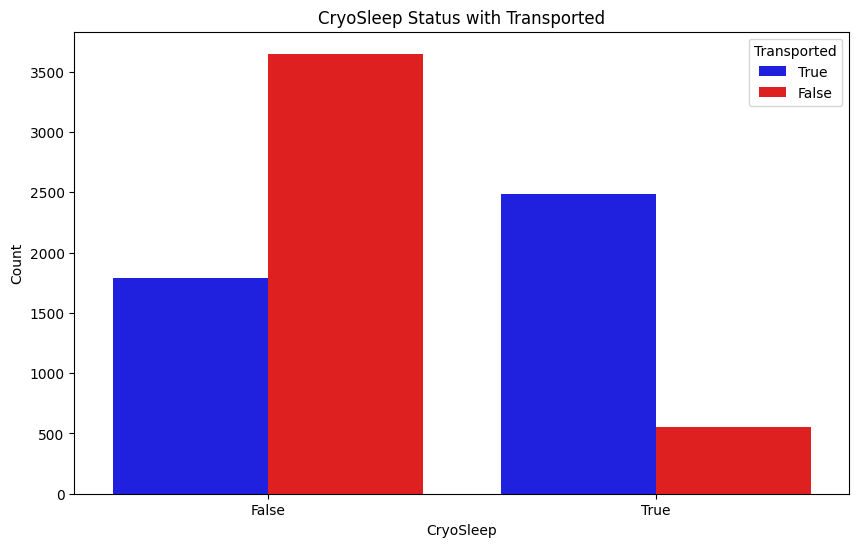

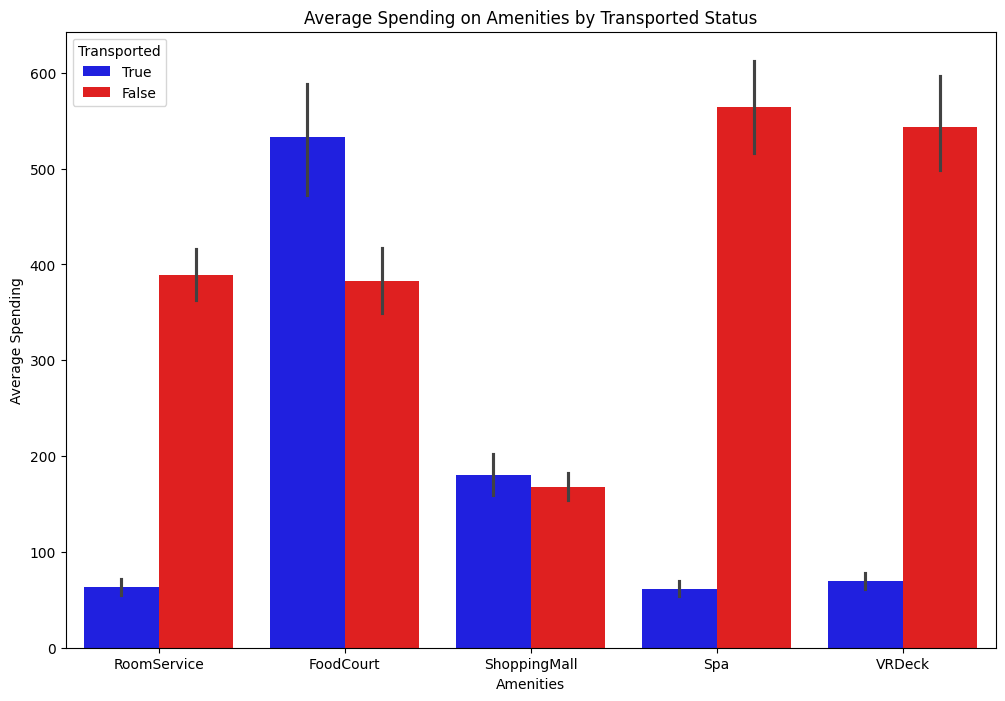

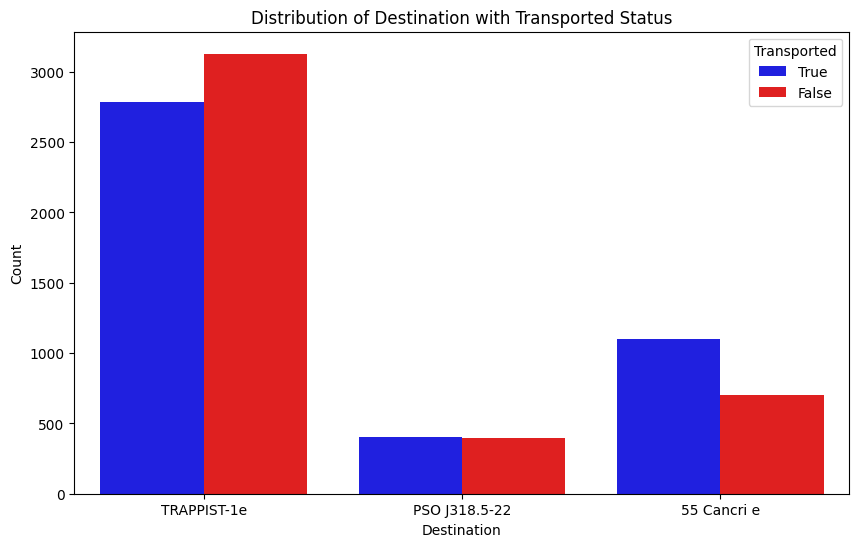

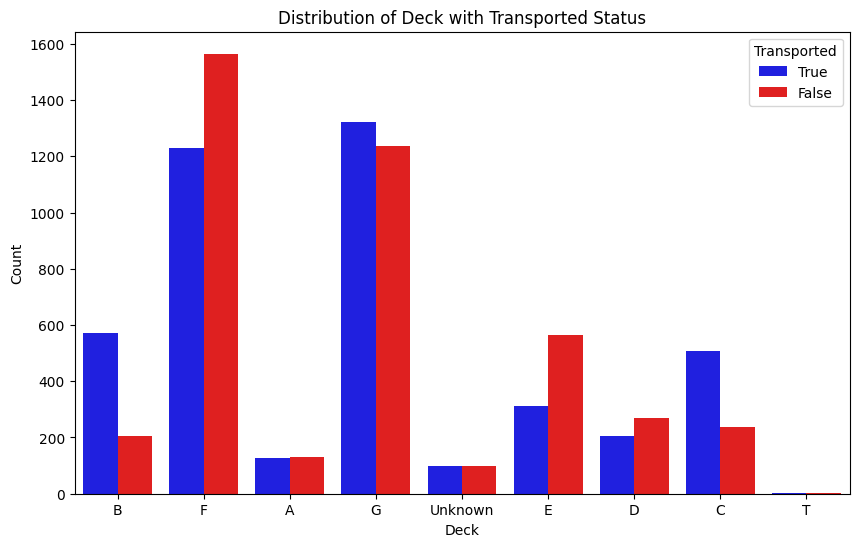

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizations
# HomePlanet Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='HomePlanet', data=data, hue='Transported', hue_order=[True, False], palette={True: "blue", False: "red"})
plt.title('Distribution of HomePlanet with Transported')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.legend(title='Transported')
plt.show()

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Transported'] == True]['Age'], kde=True, color='blue', label='Transported', alpha=0.6)
sns.histplot(data[data['Transported'] == False]['Age'], kde=True, color='red', label='Not Transported', alpha=0.6)
plt.title('Age Distribution by Transported Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# CryoSleep Status
plt.figure(figsize=(10, 6))
sns.countplot(x='CryoSleep', data=data, hue='Transported', hue_order=[True, False], palette={True: "blue", False: "red"})
plt.title('CryoSleep Status with Transported')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.legend(title='Transported')
plt.show()

# Spending on Amenities with Transported Status
plt.figure(figsize=(12, 8))
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
sns.barplot(x='variable', y='value', hue='Transported', hue_order=[True, False], 
            data=pd.melt(data, id_vars='Transported', value_vars=amenities), palette={True: "blue", False: "red"})
plt.title('Average Spending on Amenities by Transported Status')
plt.xlabel('Amenities')
plt.ylabel('Average Spending')
plt.legend(title='Transported')
plt.show()

# Destination Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Destination', data=data, hue='Transported', hue_order=[True, False], palette={True: "blue", False: "red"})
plt.title('Distribution of Destination with Transported Status')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.legend(title='Transported')
plt.show()

# Extracting deck information from Cabin
data['Deck'] = data['Cabin'].apply(lambda x: x.split('/')[0] if pd.notna(x) else 'Unknown')

# Deck Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Deck', data=data, hue='Transported', hue_order=[True, False], palette={True: "blue", False: "red"})
plt.title('Distribution of Deck with Transported Status')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.legend(title='Transported')
plt.show()


# Load the test prediction dataset
test_predictions = pd.read_csv('/Users/kreshnayogi/Desktop/Programs/MLkagglecomp/test_prediction.csv')



/var/folders/bf/cmnv0y1n1h54pdg_phyk04wr0000gn/T/ipykernel_3343/1745239340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transported', data=test_predictions, hue_order = ['True','False'], palette={'True': "blue", 'False': "red"})
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


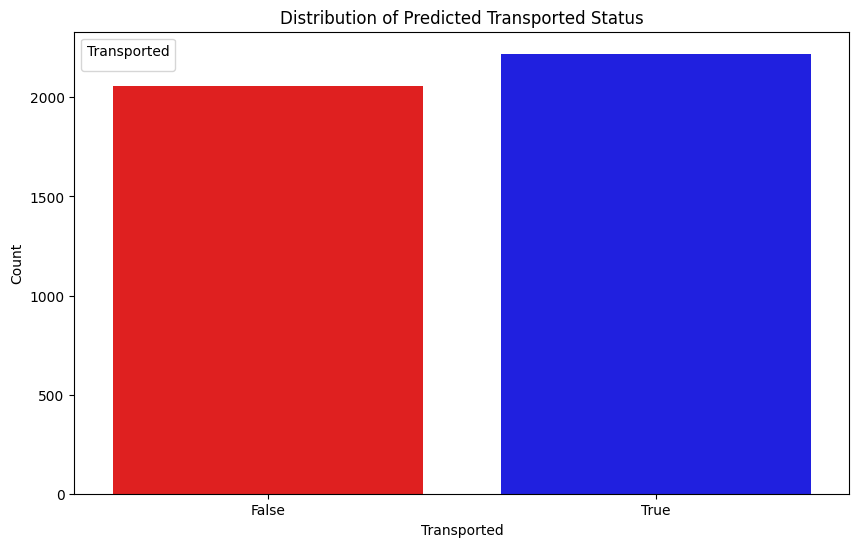

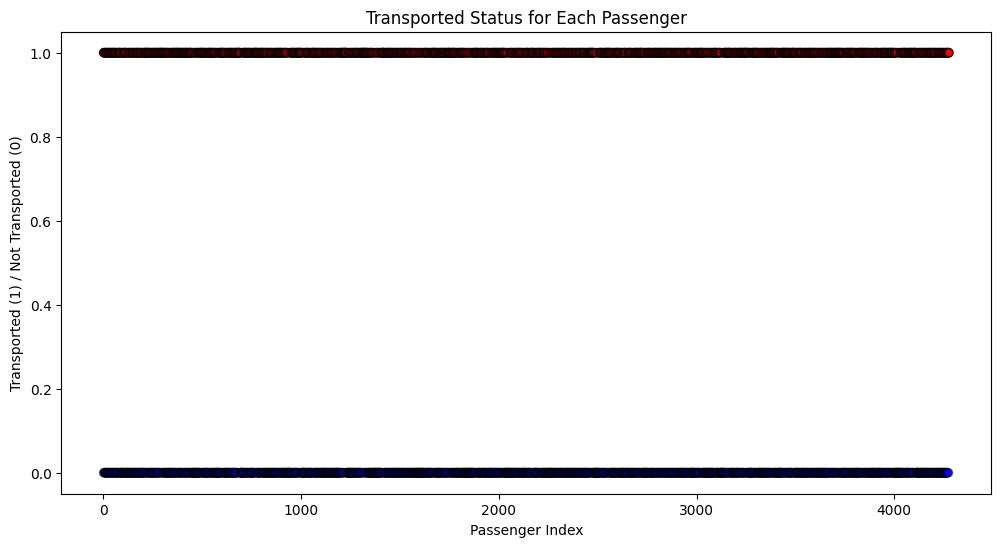

In [ ]:
# Visualize the distribution of the predictions
plt.figure(figsize=(10, 6))
sns.countplot(x='Transported', data=test_predictions, hue_order = ['True','False'], palette={'True': "blue", 'False': "red"})
plt.title('Distribution of Predicted Transported Status')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.legend(title='Transported')
plt.show()

# Add a column for the passenger index to use on the x-axis
test_predictions['PassengerIndex'] = range(1, len(test_predictions) + 1)

# Convert Transported column to binary 1/0 for plotting
test_predictions['TransportedBinary'] = test_predictions['Transported'].apply(lambda x: 1 if x else 0)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.scatter(test_predictions['PassengerIndex'], test_predictions['TransportedBinary'], alpha=0.5, c=test_predictions['TransportedBinary'], cmap='bwr', edgecolors='k')
plt.title('Transported Status for Each Passenger')
plt.xlabel('Passenger Index')
plt.ylabel('Transported (1) / Not Transported (0)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separate the features and the target variable
X = data.drop(columns=['PassengerId', 'Name', 'Transported'])
y = data['Transported']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Define preprocessing steps for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(0.7878090856814262,
 '              precision    recall  f1-score   support\n\n       False       0.80      0.77      0.78       861\n        True       0.78      0.81      0.79       878\n\n    accuracy                           0.79      1739\n   macro avg       0.79      0.79      0.79      1739\nweighted avg       0.79      0.79      0.79      1739\n')

In [ ]:
# Load the test dataset
test_file_path = '/Users/kreshnayogi/Desktop/Programs/MLkagglecomp/test.csv'
test_data = pd.read_csv(test_file_path)

# Prepare the test dataset (similar preprocessing as training set)
X_test_final = test_data.drop(columns=['PassengerId', 'Name'])

# Make predictions on the test dataset
test_predictions = model.predict(X_test_final)

# Create a DataFrame to save the results
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': test_predictions})

# Save the predictions to a CSV file
output_file_path = '/Users/kreshnayogi/Desktop/Programs/MLkagglecomp/test_prediction_output.csv'
output.to_csv(output_file_path, index=False)

output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
